## Modeling and Simulation Techniques
## Final Exam

For the final exam, I am going to solve two exercises from Chapter 13 and Chapter 14.

Chapter 13 covers "Sweeping Parameters" and Chapter 14 "Nondimensionalization"

#### Let first load all the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sympy
import pint
UNITS = pint.UnitRegistry()
import modsim
from modsim import*

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

## Exercise 1: Sweeping parameters

If we know beta and gamma, we can compute the fraction of the population that gets infected. In general, we don't know these parameters, but sometimes we can estimate them based on the behavior of an outbreak.

Suppose the infectious period for the Freshman Plague is known to be 2 days on average, and suppose during one particularly bad year, 40% of the class is infected at some point. Estimate the time between contacts, 1/beta.

**Procedure:** To solve this exercise, I am going first to download previous chapters, then define sweeping beta and sweeping gamma. Thereafter, I will estimate the time between contacts, 1/beta.

#### Download previous chapters

In [3]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')


In [4]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap11.py')

In [5]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap12.py')

In [6]:
# import code from previous notebooks

from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results

from chap12 import calc_total_infected

#### Sweeping Beta

We are going to define needed parameters as well the sweep_beta function then plot it

In [7]:
beta_array = linspace(0.1, 1.1, 11)
gamma = 0.25

def sweep_beta(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = calc_total_infected(results, system)
    return sweep

label = f'gamma = {gamma}'
label


'gamma = 0.25'

In [8]:
infected_sweep = sweep_beta(beta_array, gamma)

Parameter
0.1    0.007231
0.2    0.038411
0.3    0.337034
0.4    0.650243
0.5    0.804506
0.6    0.886287
0.7    0.931670
0.8    0.957428
0.9    0.972099
1.0    0.980344
1.1    0.984835
Name: Metric, dtype: float64

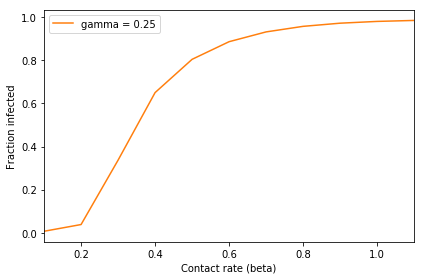

In [9]:
infected_sweep.plot(label=label, color='C1')

decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected')

####  Sweeping gamma

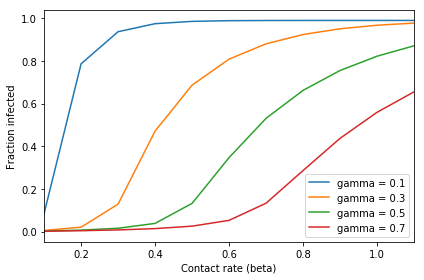

In [10]:
gamma_array = linspace(0.1, 0.7, 4)
gamma_array

for gamma in gamma_array:
    infected_sweep = sweep_beta(beta_array, gamma)
    label = f'gamma = {gamma}'
    infected_sweep.plot(label=label)
    
decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected')

#### Define gamma (fixed value) and infected_sweep

In [11]:
gamma = 1/2
infected_sweep = sweep_beta(beta_array, gamma)

Parameter
0.1    0.002736
0.2    0.007235
0.3    0.015929
0.4    0.038603
0.5    0.132438
0.6    0.346765
0.7    0.530585
0.8    0.661553
0.9    0.754595
1.0    0.821534
1.1    0.870219
Name: Metric, dtype: float64

#### Interpolate infected_sweep

We are going to interpolate the infected_sweep so that we can find the best estimate.
Here, we are going to use crossings function

In [12]:
beta_estimate = crossings(infected_sweep, 0.4)

array([0.62548698])

#### Time between contacts

In [13]:
Time_between_contacts = 1/beta_estimate

array([1.59875429])

The time between contacts, 1/beta is therefore 1.59875429

#### Bonus: 
As bonus, I am going to use a sweepframe and find the contour.

#### Using a SweepFrame

In [14]:
def sweep_parameters(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta(beta_array, gamma)
    return frame

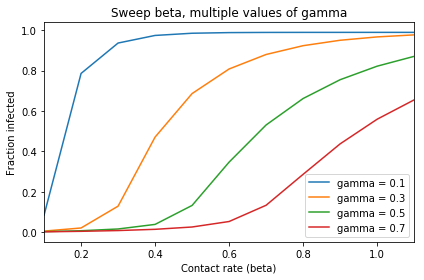

In [15]:
frame = sweep_parameters(beta_array, gamma_array)

for gamma in gamma_array:
    label = f'gamma = {gamma}'
    frame[gamma].plot(label=label)

decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected',
         title='Sweep beta, multiple values of gamma')

Alternatively, we can plot each row like this:

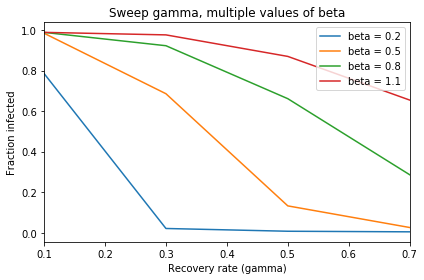

In [16]:
for beta in [0.2, 0.5, 0.8, 1.1]:
    label = f'beta = {beta}'
    frame.loc[beta].plot(label=label)
    
decorate(xlabel='Recovery rate (gamma)',
         ylabel='Fraction infected',
         title='Sweep gamma, multiple values of beta')

The countour

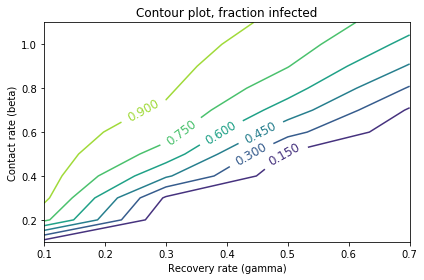

In [17]:
contour(frame)

decorate(xlabel='Recovery rate (gamma)',
         ylabel='Contact rate (beta)',
         title='Contour plot, fraction infected')

## Exercise 2: Nondimensionalization

Write a version of plot_sweep_frame, called plot_sweep_frame_difference, that plots the fraction infected versus the difference beta-gamma.

What do the results look like, and what does that imply?


#### Define frame

In [18]:
beta_array = [0.1, 0.2, 0.3, 0.4, 0.5, 
              0.6, 0.7, 0.8, 0.9, 1.0 , 1.1]
gamma_array = [0.2, 0.4, 0.6, 0.8]
frame = sweep_parameters(beta_array, gamma_array)

,0.2,0.4,0.6,0.8
Parameter,,,,
0.1,0.010756,0.003642,0.002191,0.001567
0.2,0.118984,0.010763,0.005447,0.003644
0.3,0.589095,0.030185,0.010771,0.006526
0.4,0.801339,0.131563,0.020917,0.010780
0.5,0.896577,0.396409,0.046140,0.017640
0.6,0.942929,0.597902,0.132889,0.030292
0.7,0.966299,0.728470,0.311843,0.058824
0.8,0.978152,0.814460,0.478326,0.133589
0.9,0.984057,0.872270,0.605688,0.266890


Define sweep_frame_difference

In [19]:
from matplotlib.pyplot import plot
def plot_sweep_frame_difference(frame):
    for gamma in frame.columns:
        column = frame[gamma]
        for beta in column.index:
            frac_infected = column[beta]
            plot(beta - gamma, frac_infected, 'ro')

Plot the results

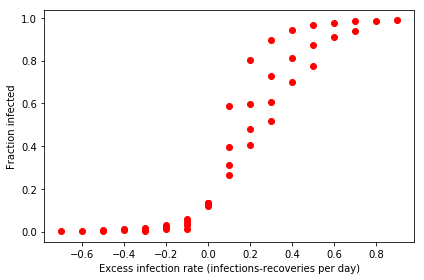

In [20]:
plot_sweep_frame_difference(frame)

decorate(xlabel='Excess infection rate (infections-recoveries per day)',
         ylabel='Fraction infected')

From the results and the graph we can say that it's not enough to predict the fraction infected knowing only the difference between `beta` and `gamma`, and not their ratio.